# Exploración y Análisis de Retrasos en Vuelos

## Descripción

Este proyecto tiene como objetivo analizar los datos de vuelos de un aeropuerto utilizando un dataset obtenido de Kaggle. El análisis incluye el examen de patrones de tiempo y tendencias, el rendimiento de diferentes compañías aéreas y la evaluación de las rutas de vuelo.

## Herramientas y Tecnologías Utilizadas

* Jupyter Notebook y Python: EDA (Exploratory Data Analysis), visualizaciones y modelado.
* Bibliotecas:
  - Pandas: Manipulación y análisis de datos.
  - NumPy: Operaciones numéricas y matemáticas.
  - Matplotlib: Visualización de datos.
  - Seaborn: Visualización de datos basada en Matplotlib.
* Tableau: Dashboards interactivos.



# Paso 1: Carga y Exploración Inicial del Dataset

El primer paso es cargar el dataset y realizar una exploración inicial para entender mejor la estructura y el contenido de los datos. Esto incluye mostrar las primeras filas del dataset, obtener información general sobre las columnas y sus tipos de datos, y generar estadísticas descriptivas.

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('flights.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Información general sobre el dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())


   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute      time_hour                    name  
0      1400     5      15  1/1/2013 5:00   

## Paso 2: Limpieza de Datos

En esta etapa del análisis, identificamos y manejamos los valores nulos presentes en el dataset. Los valores nulos pueden surgir por diversas razones, como errores en la recolección de datos o información faltante. Es importante abordar estos valores nulos para evitar problemas en el análisis y modelado de datos. Se convierten las columnas necesarias a tipos de datos adecuados. Además, se crean nuevas columnas que pueden facilitar el análisis, como el año, mes y día extraídos de la columna de fecha, y las horas y minutos programados de salida y llegada.

In [2]:
# Manejo de valores nulos (Optamos por eliminar las filas que contienen valores nulos)
df.dropna(inplace=True)

# Convertir la columna 'time_hour' a tipo datetime
df['time_hour'] = pd.to_datetime(df['time_hour'])

# Crear nuevas columnas para año, mes y día
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day

# Crear columnas para la hora y minuto de salida programada
df['sched_dep_hour'] = df['sched_dep_time'] // 100
df['sched_dep_minute'] = df['sched_dep_time'] % 100

# Crear columnas para la hora y minuto de llegada programada
df['sched_arr_hour'] = df['sched_arr_time'] // 100
df['sched_arr_minute'] = df['sched_arr_time'] % 100

# Mostrar las primeras filas después de la limpieza
print(df.head())

# Guardar el dataframe limpio en un archivo CSV
df.to_csv('cleaned_flights.csv', index=False)



   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... air_time  distance hour minute  \
0             819       11.0  ...    227.0      1400    5     15   
1             830       20.0  ...    227.0      1416    5     29   
2             850       33.0  ...    160.0      1089    5     40   
3            1022      -18.0  ...    183.0      1576    5     45   
4             837      -25.0  ...    116.0       762    6      0   

            time_hour                    name  sched_dep_hour  \
0 2013-01-01 05:00:00   United Air Lines Inc.               5   
1 2013-01-01 05:

# Paso 3: Análisis Exploratorio de Datos (EDA)

## Distribución de Retrasos de Salida

Para entender cómo se distribuyen los retrasos de salida, se utiliza un histograma. Esto nos ayuda a identificar la frecuencia de los diferentes tiempos de retraso y detectar cualquier patrón significativo.

C:\Users\Data Analysis Study\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


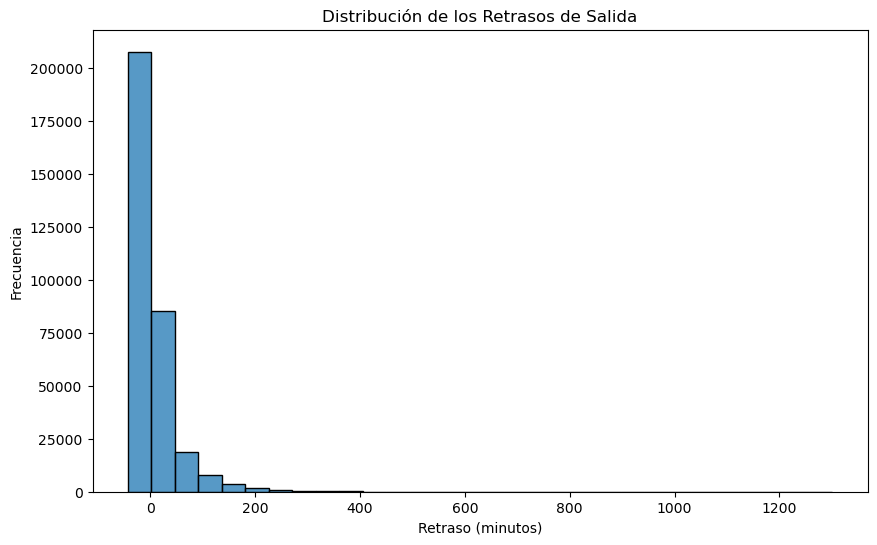

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de los retrasos
plt.figure(figsize=(10, 6))
sns.histplot(df['dep_delay'], bins=30)
plt.title('Distribución de los Retrasos de Salida')
plt.xlabel('Retraso (minutos)')
plt.ylabel('Frecuencia')
plt.show()


## Retrasos Promedio por Mes

Analizar los retrasos promedio por mes puede revelar patrones estacionales y ayudar a identificar los meses con mayores y menores retrasos. Esta información es valiosa para la planificación y gestión operativa.

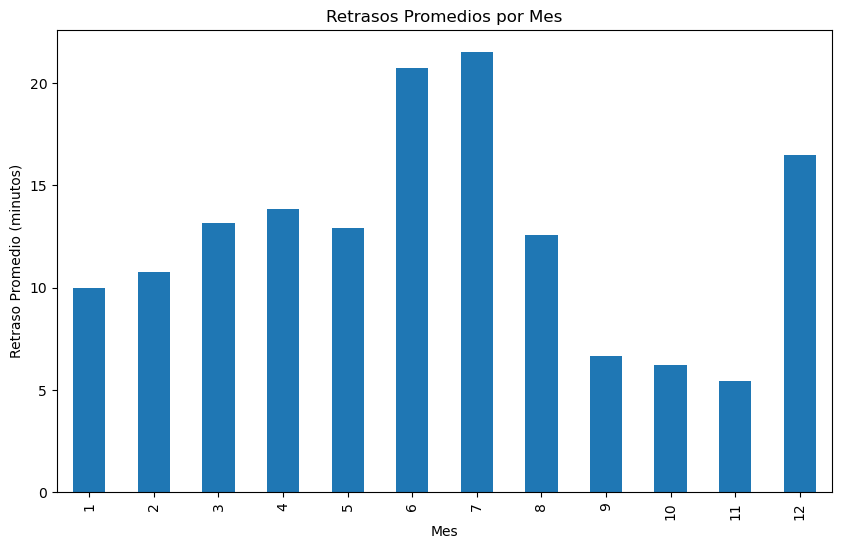

In [4]:
# Retrasos promedio por mes
avg_delay_per_month = df.groupby('month')['dep_delay'].mean()

plt.figure(figsize=(10, 6))
avg_delay_per_month.plot(kind='bar')
plt.title('Retrasos Promedios por Mes')
plt.xlabel('Mes')
plt.ylabel('Retraso Promedio (minutos)')
plt.show()


## Número de Vuelos por Compañía Aérea

Evaluar el número de vuelos por compañía aérea nos permite entender mejor la distribución de vuelos entre las diferentes aerolíneas y su volumen de operaciones en el aeropuerto analizado.

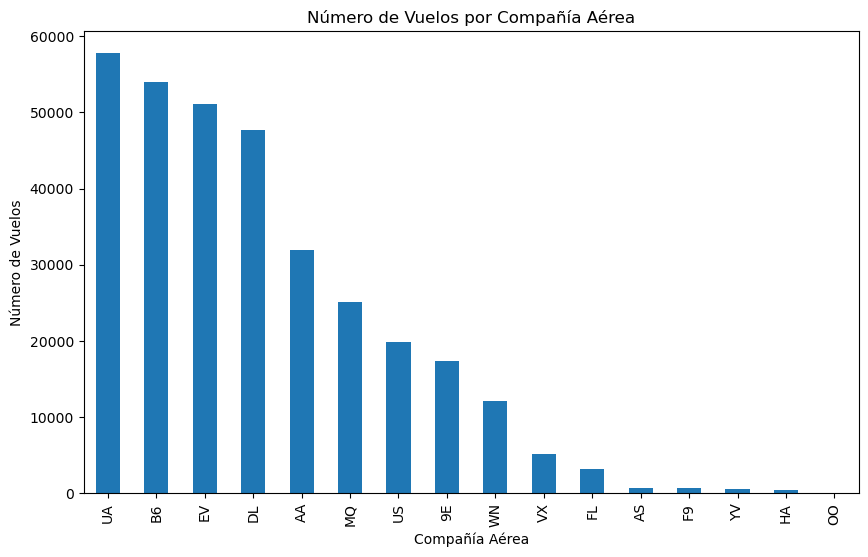

In [5]:
# Número de vuelos por compañía
flights_per_airline = df['carrier'].value_counts()

plt.figure(figsize=(10, 6))
flights_per_airline.plot(kind='bar')
plt.title('Número de Vuelos por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de Vuelos')
plt.show()


## Evaluación de Rutas de Vuelo

## Rutas Populares
Las rutas más frecuentemente voladas nos dan una idea de las conexiones más importantes desde el aeropuerto analizado. A continuación, mostramos las 10 rutas más populares basadas en la frecuencia de vuelos.

In [6]:
# Cargar el dataset limpio
df = pd.read_csv('cleaned_flights.csv')

# Contar la frecuencia de vuelos por ruta (origen-destino)
route_counts = df.groupby(['origin', 'dest']).size().reset_index(name='counts')
route_counts = route_counts.sort_values(by='counts', ascending=False)

# Mostrar las 10 rutas más populares
print(route_counts.head(10))

    origin dest  counts
116    JFK  LAX   11159
155    LGA  ATL   10041
203    LGA  ORD    8507
145    JFK  SFO    8109
169    LGA  CLT    5961
54     EWR  ORD    5828
91     JFK  BOS    5773
196    LGA  MIA    5702
119    JFK  MCO    5429
7      EWR  BOS    5247


## Distancias y Duraciones de Vuelo
Analizaremos la distancia y la duración de los vuelos para comprender mejor las características de las rutas.

count    327346.000000
mean       1048.371314
std         735.908523
min          80.000000
25%         509.000000
50%         888.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64
count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64


C:\Users\Data Analysis Study\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


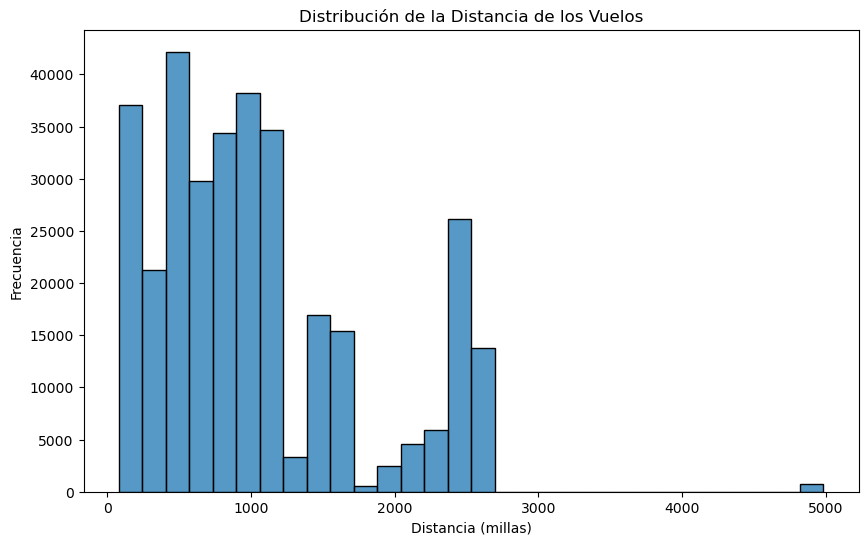

C:\Users\Data Analysis Study\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


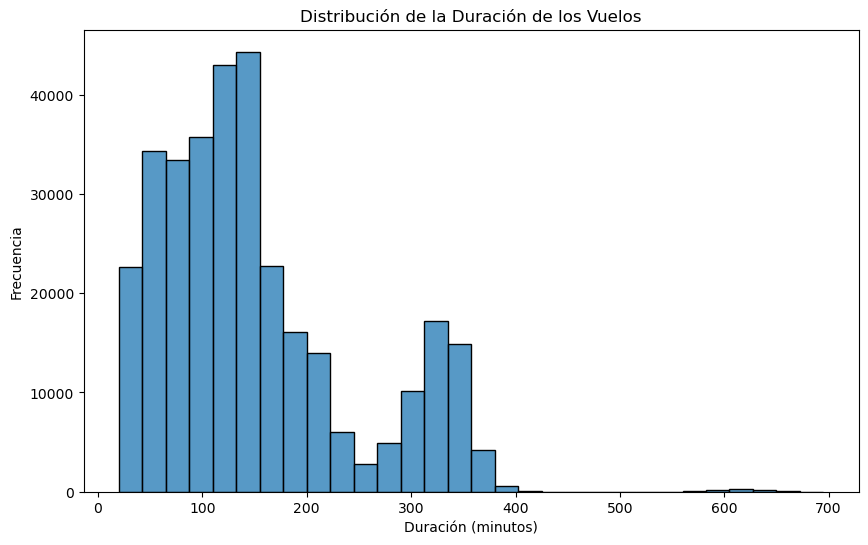

In [7]:
# Análisis de la distancia de los vuelos
distance_stats = df['distance'].describe()
print(distance_stats)

# Análisis de la duración del vuelo
air_time_stats = df['air_time'].describe()
print(air_time_stats)

# Visualización de la distribución de distancias
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], bins=30)
plt.title('Distribución de la Distancia de los Vuelos')
plt.xlabel('Distancia (millas)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la duración de los vuelos
plt.figure(figsize=(10, 6))
sns.histplot(df['air_time'], bins=30)
plt.title('Distribución de la Duración de los Vuelos')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


## Puntualidad de Rutas
Evaluaremos la puntualidad de las diferentes rutas analizando los retrasos promedio por ruta (origen-destino).

    origin dest  dep_delay
83     EWR  TYS  41.654952
81     EWR  TUL  34.887755
13     EWR  CAE  34.361702
214    LGA  SBN  31.333333
36     EWR  JAC  29.842105
164    LGA  CAE  29.500000
23     EWR  DSM  29.487179
52     EWR  OKC  29.180952
158    LGA  BHM  29.097015
65     EWR  ROC  27.979508


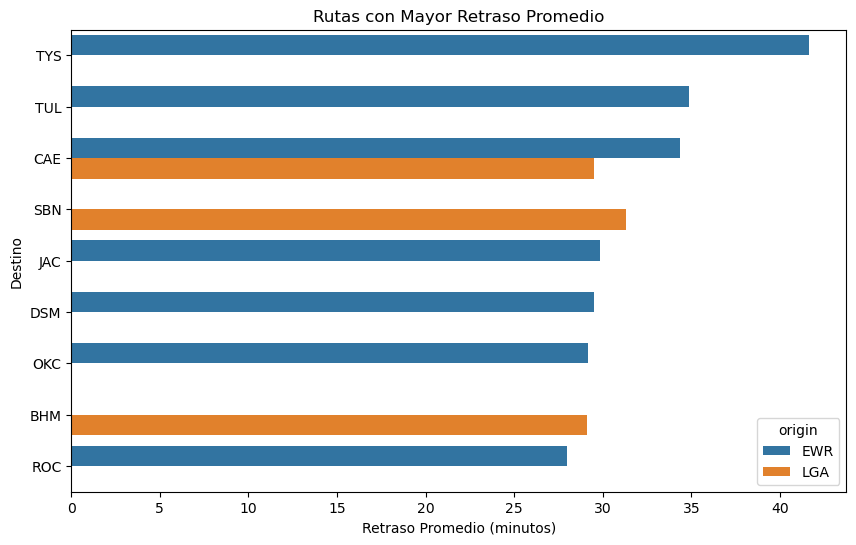

In [8]:
# Calcular el retraso promedio por ruta
avg_delay_per_route = df.groupby(['origin', 'dest'])['dep_delay'].mean().reset_index()
avg_delay_per_route = avg_delay_per_route.sort_values(by='dep_delay', ascending=False)

# Mostrar las 10 rutas con mayor retraso promedio
print(avg_delay_per_route.head(10))

# Visualización de las rutas con mayor retraso promedio
plt.figure(figsize=(10, 6))
top_delayed_routes = avg_delay_per_route.head(10)
sns.barplot(x='dep_delay', y='dest', hue='origin', data=top_delayed_routes)
plt.title('Rutas con Mayor Retraso Promedio')
plt.xlabel('Retraso Promedio (minutos)')
plt.ylabel('Destino')
plt.show()


## Paso 4: Visualización de Datos

Después de realizar el análisis exploratorio, los datos se guardan en un archivo CSV limpio para su uso en Tableau Public. Tableau permite crear visualizaciones interactivas que proporcionan una presentación más atractiva y accesible de los resultados del análisis.

In [9]:
# Guardar el dataframe limpio en un archivo CSV
df.to_csv('cleaned_flights.csv', index=False)


# Resultados y Conclusiones
## Patrones y Tendencias de Tiempo
* Distribución de Retrasos de Salida: La mayoría de los vuelos tienen un retraso de salida cercano a cero, con algunos vuelos que presentan retrasos significativos. Esto indica que los retrasos extremos son relativamente raros.
* Retrasos Promedio por Mes: Los meses con mayores retrasos promedio son junio y julio, mientras que septiembre y noviembre tienen los menores retrasos promedio. Esto sugiere una tendencia estacional, posiblemente debido a condiciones climáticas o picos en la demanda de viajes.
## Rendimiento de Diferentes Compañías Aéreas
* Número de Vuelos por Compañía Aérea: United Airlines (UA) es la compañía con más vuelos, seguida por JetBlue Airways (B6) y ExpressJet Airlines (EV). Esto indica que estas aerolíneas tienen una fuerte presencia en el aeropuerto analizado.
## Evaluación de Rutas de Vuelo
Para evaluar las rutas de vuelo, analizamos el origen y destino de los vuelos, así como la distancia y duración del vuelo. Esto nos permite identificar las rutas más populares y su desempeño en términos de puntualidad.
- Rutas Populares: Las rutas más frecuentemente voladas conectan principalmente los aeropuertos más grandes y concurridos.
- Distancias y Duraciones de Vuelo: La mayoría de los vuelos tienen distancias y duraciones moderadas, con algunos vuelos de larga distancia que se destacan.
- Puntualidad de Rutas: Las rutas con mayor retraso promedio son aquellas desde el aeropuerto de Newark (EWR) a Knoxville (TYS), Tulsa (TUL), y Columbia (CAE), indicando posibles problemas operativos o de congestión en estas rutas.

